<a href="https://colab.research.google.com/github/Bharaths12/Github-API-Finder/blob/main/6_udemy_courses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
data=pd.read_csv('udemy_courses.csv',parse_dates=['published_timestamp'])

In [6]:
data.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


**Check NULL values in the Dataset**

In [13]:
data.isnull().values.any()

np.False_

In [14]:
data.isnull().sum()

,0
course_id,0
course_title,0
url,0
is_paid,0
price,0
num_subscribers,0
num_reviews,0
num_lectures,0
level,0
content_duration,0


<Axes: >

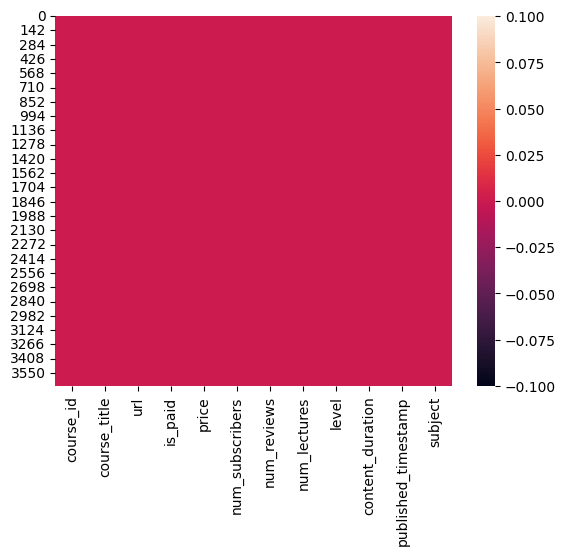

In [17]:
sns.heatmap(data.isnull())

**Check Duplicates and drop them**

In [23]:
dup=data.duplicated().any()
print("Are there any Dulpicated values in data?",dup)

Are there any Dulpicated values in data? True


In [25]:
data=data.drop_duplicates()

In [26]:
dup=data.duplicated().any()
print("Are there any Dulpicated values in data?",dup)

Are there any Dulpicated values in data? False


**Find Number of courses per subject**

In [28]:
data.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [31]:
data['subject'].value_counts()

,count
subject,
Web Development,1199
Business Finance,1191
Musical Instruments,680
Graphic Design,602


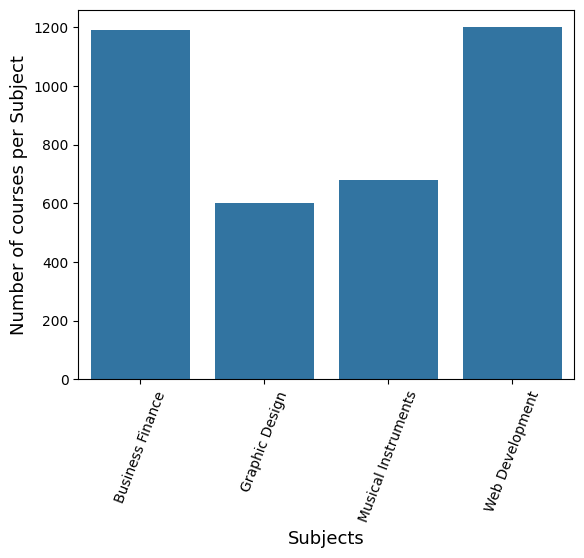

In [45]:
sns.countplot(x=data['subject'])
plt.xlabel("Subjects",fontsize=13)
plt.ylabel('Number of courses per Subject',fontsize=13)
plt.xticks(rotation=69)
plt.show()

**For Which levels udemy is provinding courses**

In [37]:
data.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [46]:
data['level'].value_counts()

,count
level,
All Levels,1925
Beginner Level,1268
Intermediate Level,421
Expert Level,58


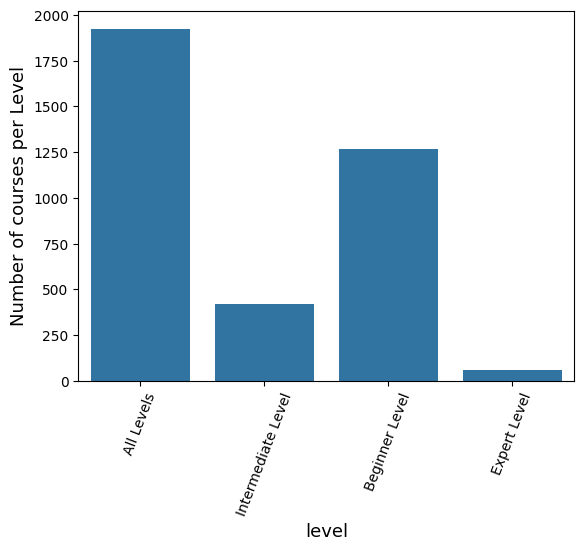

In [48]:
sns.countplot(x=data['level'])
plt.xlabel("level",fontsize=13)
plt.ylabel('Number of courses per Level',fontsize=13)
plt.xticks(rotation=69)
plt.show()

**Display the Count of Paid and Free Courses**

In [49]:
data.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [50]:
data['is_paid'].value_counts()

,count
is_paid,
True,3362
False,310


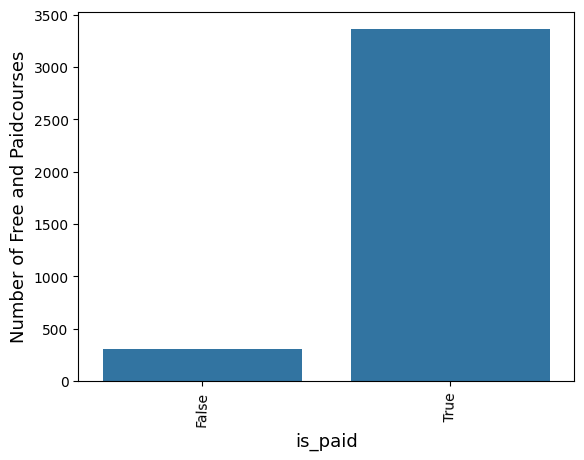

In [53]:
sns.countplot(x=data['is_paid'])
plt.xlabel("is_paid",fontsize=13)
plt.ylabel('Number of Free and Paidcourses',fontsize=13)
plt.xticks(rotation=88)
plt.show()

**Which Course has More Lectures (free or Paid)**

In [54]:
data.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [72]:
data.groupby(['is_paid']).mean(numeric_only=True)

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
is_paid,,,,,,
False,691446.970968,0.000000,11533.951613,425.929032,21.416129,2.210753
True,674463.946163,72.198096,2421.270077,131.516359,41.866746,4.271584


**Which Course have a Higher Number of Subscribers Free or Paid**

<Axes: xlabel='is_paid', ylabel='num_subscribers'>

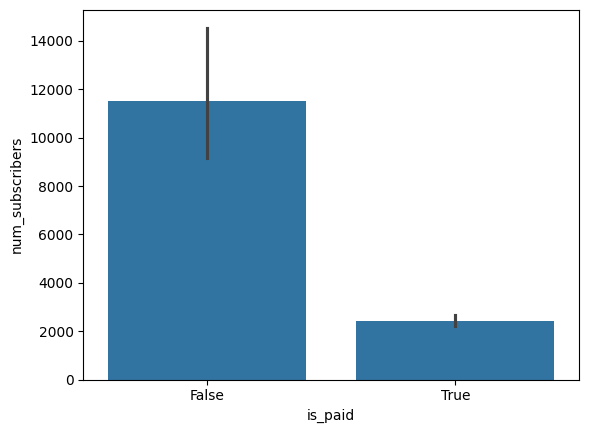

In [75]:
sns.barplot(x='is_paid',y='num_subscribers',data=data)

In [77]:
data.groupby(['is_paid'])['num_subscribers'].mean()


,num_subscribers
is_paid,
False,11533.951613
True,2421.270077


**Which level has the highest Number of subscribers?**

In [80]:
data.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [91]:
data.groupby(['level'])['num_subscribers'].mean()

,num_subscribers
level,
All Levels,3569.761558
Beginner Level,3195.459779
Expert Level,865.448276
Intermediate Level,1762.482185


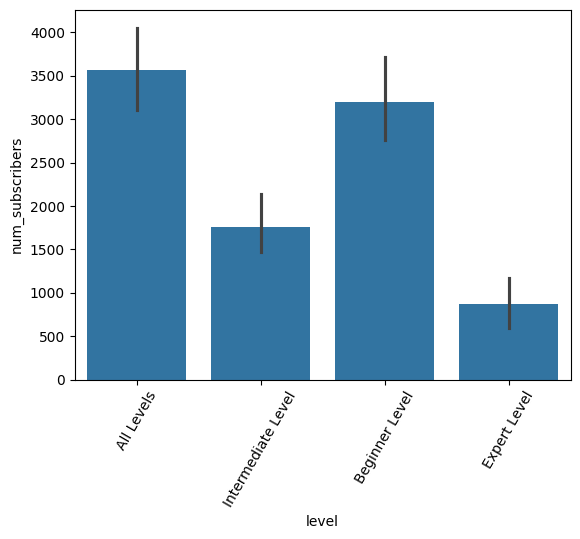

In [92]:
sns.barplot(x='level',y='num_subscribers',data=data)
plt.xticks(rotation=60)
plt.show()

**Find Most Popular Course Title**

In [93]:
data.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [99]:
data[data['num_subscribers'].max()==data['num_subscribers']]['course_title']

,course_title
2827,Learn HTML5 Programming From Scratch


**Display 10 most Popular Courses As per Number of Subscribers**

In [101]:
data.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [106]:
top_10=data.sort_values(by='num_subscribers',ascending=False).head(10)

<Axes: xlabel='num_subscribers', ylabel='course_title'>

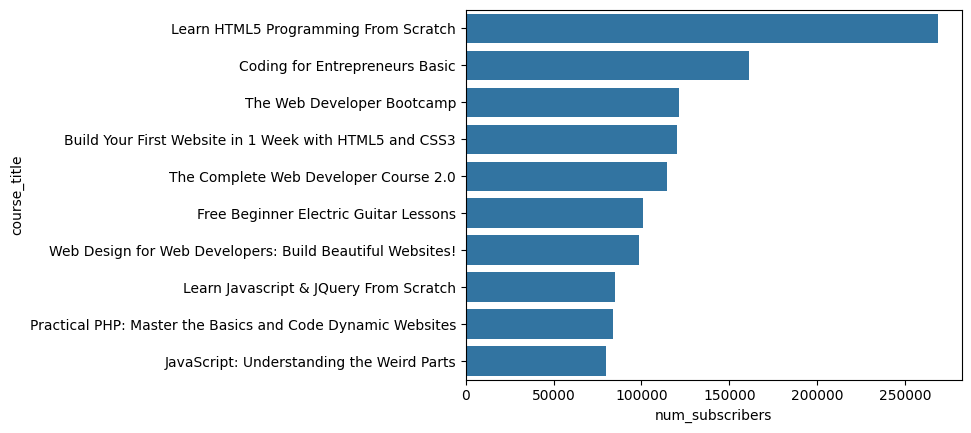

In [107]:
sns.barplot(x='num_subscribers',y='course_title',data=top_10)

**Find Courses which is having highest number review**

In [109]:
data.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

<Axes: xlabel='subject', ylabel='num_reviews'>

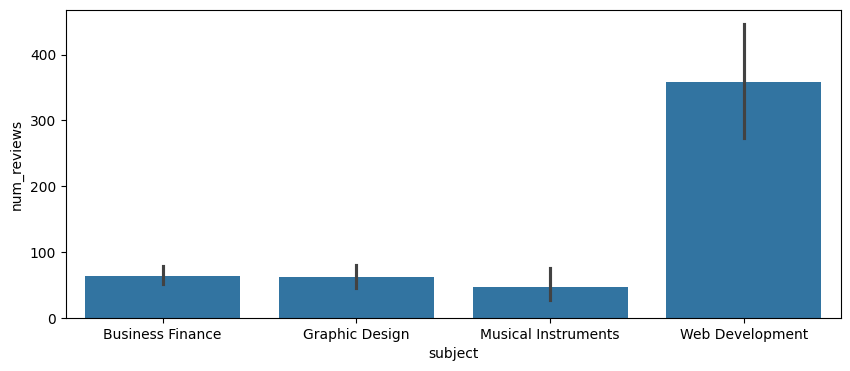

In [117]:
plt.figure(figsize=(10,4))
sns.barplot(x='subject',y='num_reviews',data=data)

**Does price effect number of reviews**

<Axes: xlabel='price', ylabel='num_reviews'>

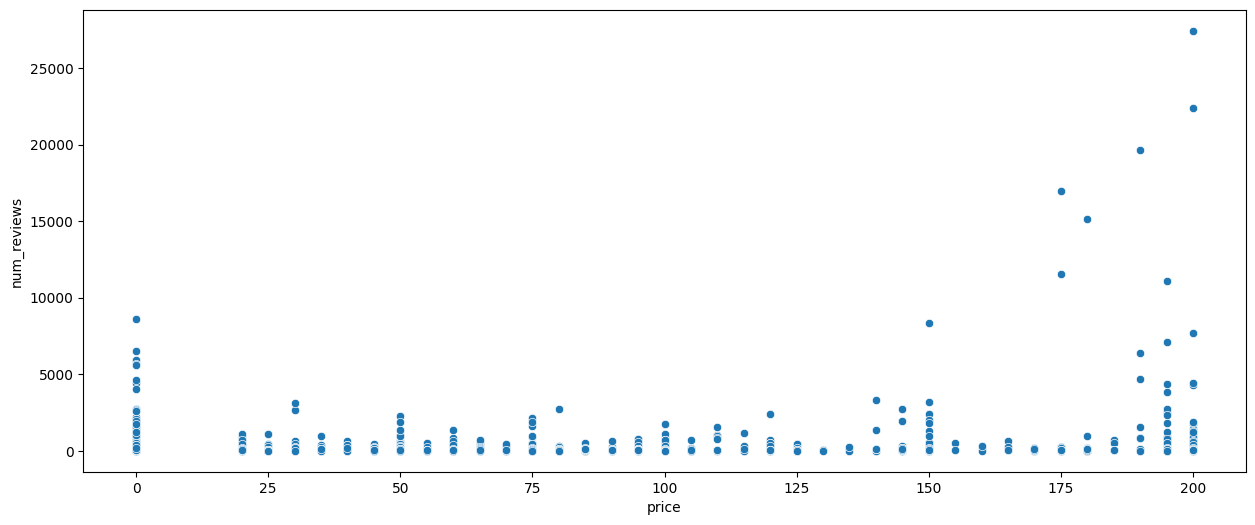

In [124]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='price',y='num_reviews',data=data)

**Find Total number of courses related to python**

In [125]:
data.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [134]:
data[data['course_title'].str.contains('python',case=False)].head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
14,1196544,Python Algo Trading: Sentiment Trading with News,https://www.udemy.com/hedge-fund-strategy-trad...,True,200,294,19,42,All Levels,7.0,2017-04-28 16:41:44+00:00,Business Finance
30,1170894,Python Algo Stock Trading: Automate Your Trading!,https://www.udemy.com/algorithmic-stock-tradin...,True,95,1165,21,41,Beginner Level,2.5,2017-05-28 23:41:03+00:00,Business Finance
41,1035472,Python for Finance: Investment Fundamentals & ...,https://www.udemy.com/python-for-finance-inves...,True,195,3811,278,103,All Levels,6.5,2017-03-30 22:17:09+00:00,Business Finance
147,1070886,Python Algo Trading: FX Trading with Oanda,https://www.udemy.com/python-algo-trading-fx-t...,True,200,453,42,33,Intermediate Level,3.0,2017-03-14 00:39:45+00:00,Business Finance
334,815482,Stock Technical Analysis with Python,https://www.udemy.com/stock-technical-analysis...,True,50,409,35,46,All Levels,8.0,2016-04-12 00:40:03+00:00,Business Finance


In [135]:
len(data[data['course_title'].str.contains('python',case=False)])

29

Display 10 MostPopular Python Courses as per number subscriber

In [137]:
python = data[data['course_title'].str.contains('python',case=False)].sort_values(by='num_subscribers',ascending=False).head(10)

<Axes: xlabel='num_subscribers', ylabel='course_title'>

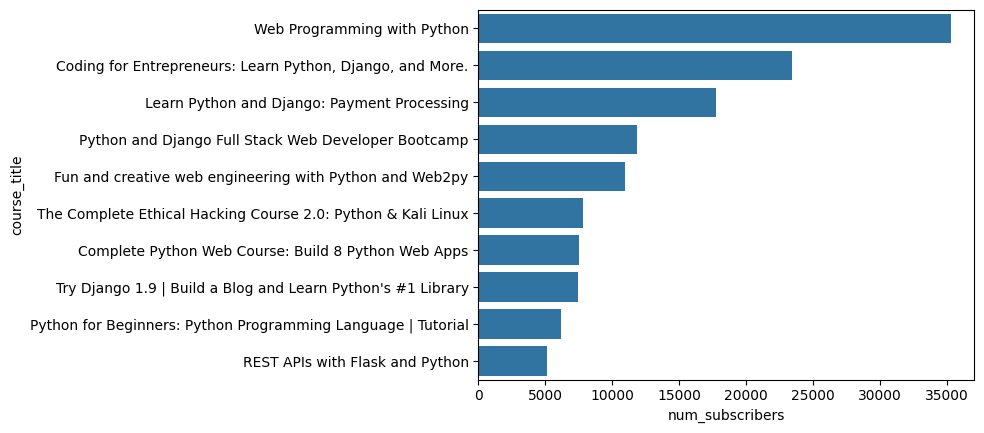

In [139]:
sns.barplot(x='num_subscribers',y='course_title',data=python)

**In which year the highest number of courses were posted**

In [140]:
data.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [143]:
data['year']=data['published_timestamp'].dt.year

<Axes: xlabel='year', ylabel='count'>

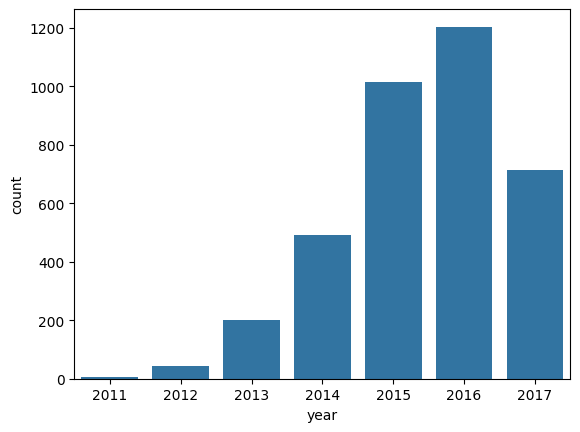

In [144]:
sns.countplot(x='year',data=data)

In [152]:
data['year'].value_counts().head(1)

,count
year,
2016,1204


**Display category wise count of posted subjects [year wise]**

In [153]:
data.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject', 'year'],
      dtype='object')

In [157]:
data.groupby(['year'])['subject'].value_counts()

year  subject            
2011  Web Development          5
2012  Web Development         19
      Graphic Design          10
      Musical Instruments     10
      Business Finance         6
2013  Business Finance        84
      Web Development         55
      Musical Instruments     39
      Graphic Design          23
2014  Business Finance       192
      Musical Instruments    120
      Web Development        113
      Graphic Design          65
2015  Business Finance       339
      Web Development        336
      Musical Instruments    171
      Graphic Design         168
2016  Web Development        448
      Business Finance       347
      Musical Instruments    228
      Graphic Design         181
2017  Business Finance       223
      Web Development        223
      Graphic Design         155
      Musical Instruments    112
Name: count, dtype: int64